In [3]:
figdir = '../../figure/hopping'

os.makedirs(figdir, exist_ok=True)

In [8]:
from matplotlib import pyplot as plt

In [9]:
from scipy.misc import factorial
from scipy.special import eval_hermite
from scipy.constants import hbar, proton_mass

λ = 1064e-9
k = 2*np.pi / λ
a = λ / 2
V_0 = -50

x = -a + 2*a*np.linspace(0, 1, 1000)
y = x / 2.2

V_lat = V_0 * np.cos(k*x)**2
V_har = V_0 * (1-(k*y)**2 / 2)

E = np.sqrt(2*np.abs(V_0))

def wavefunction_harmonic(n, x):
    scale = (2 / np.abs(V_0))**(1/4) / k
    
    x = x.copy()
    x /= scale
    
    return np.exp(-x**2 / 2) * eval_hermite(n, x) / np.sqrt(2**n * factorial(n) * np.sqrt(np.pi))

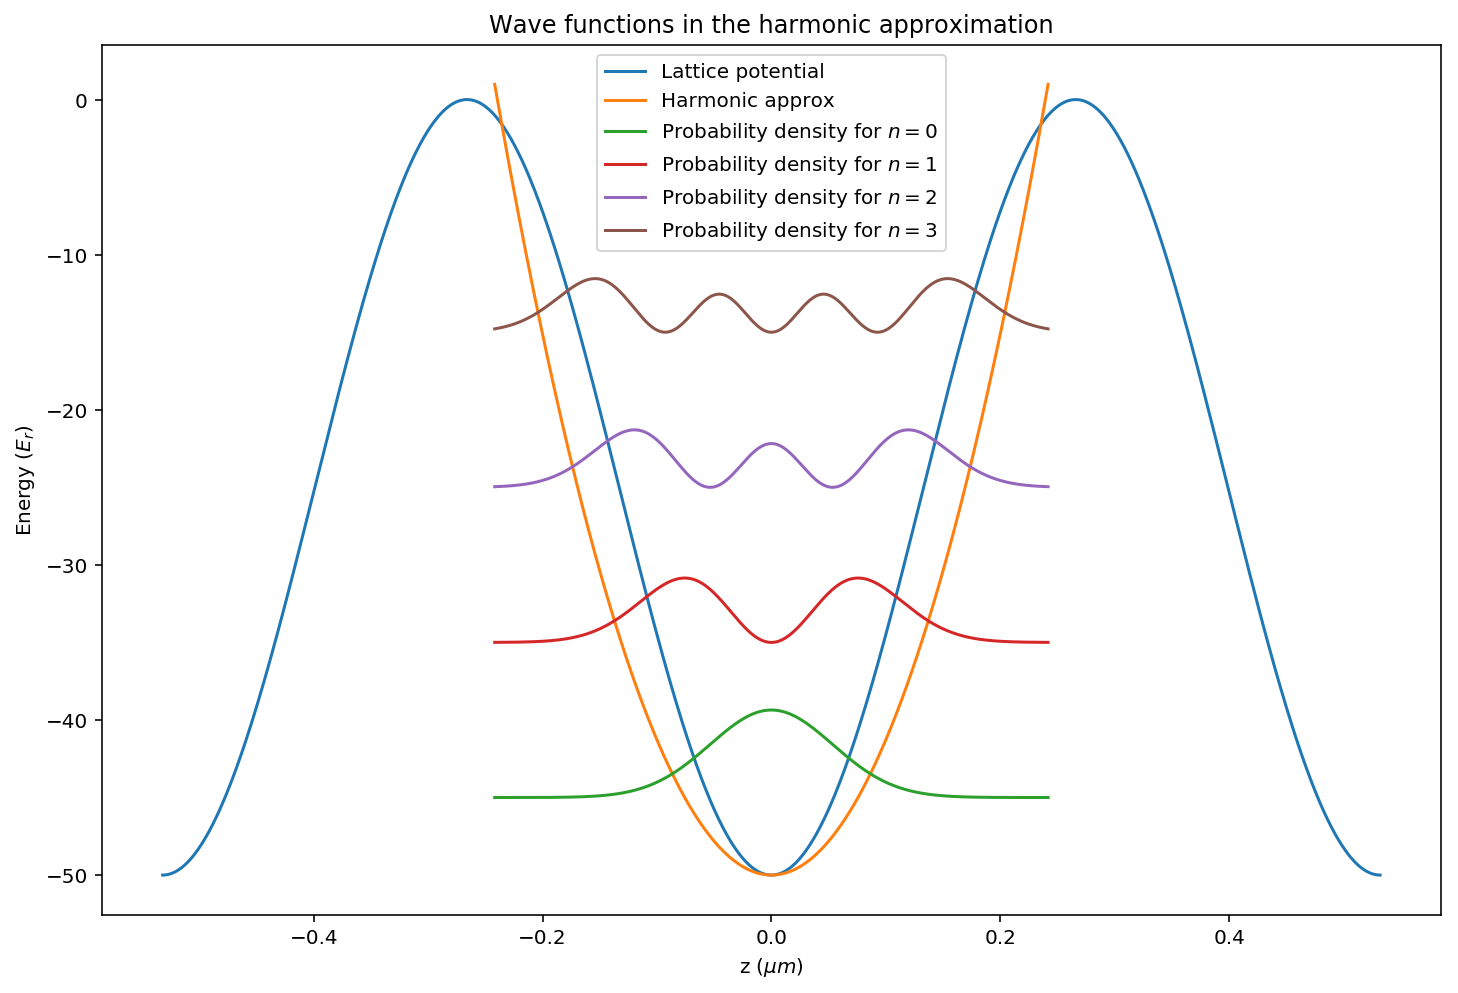

In [10]:
plt.figure(figsize=(12, 8))

plt.plot(x / 1e-6, V_lat, label='Lattice potential')
plt.plot(y / 1e-6, V_har, label='Harmonic approx')

for n in range(4):
    plt.plot(y / 1e-6, V_0 + E*(n+.5+wavefunction_harmonic(n, y)**2), label=f'Probability density for $n = {n}$')

plt.title('Wave functions in the harmonic approximation')
plt.xlabel('z $(\mu m)$')
plt.ylabel('Energy $(E_r)$')
plt.legend()
plt.savefig(os.path.join(figdir, 'harmonic.pdf'))
plt.show()

In [53]:
# lattice sites
N = 51

# matrix dimensions
M = 60

# lattice depth
V_0 = -10
V = V_0*np.cos(k*x)

# quasi momentum (k)
qk = np.linspace(-1, 1, N // 2)

# matrix elements
H = np.zeros((M, M, N // 2))

for n in range(-M//2, +M//2+1):
    for m in range(-M//2, +M//2+1):
        if n == m:
            H[n, m] = (2*n+qk)**2+.5*V_0
        if np.abs(n - m) == 1:
            H[n, m] = .25*V_0

In [54]:
E = []

for n in range(H.shape[-1]):
    eigval, _ = np.linalg.eig(H[:,:,n])
    eigval.sort()
    
    E.append(eigval)
    
E = np.array(E).T

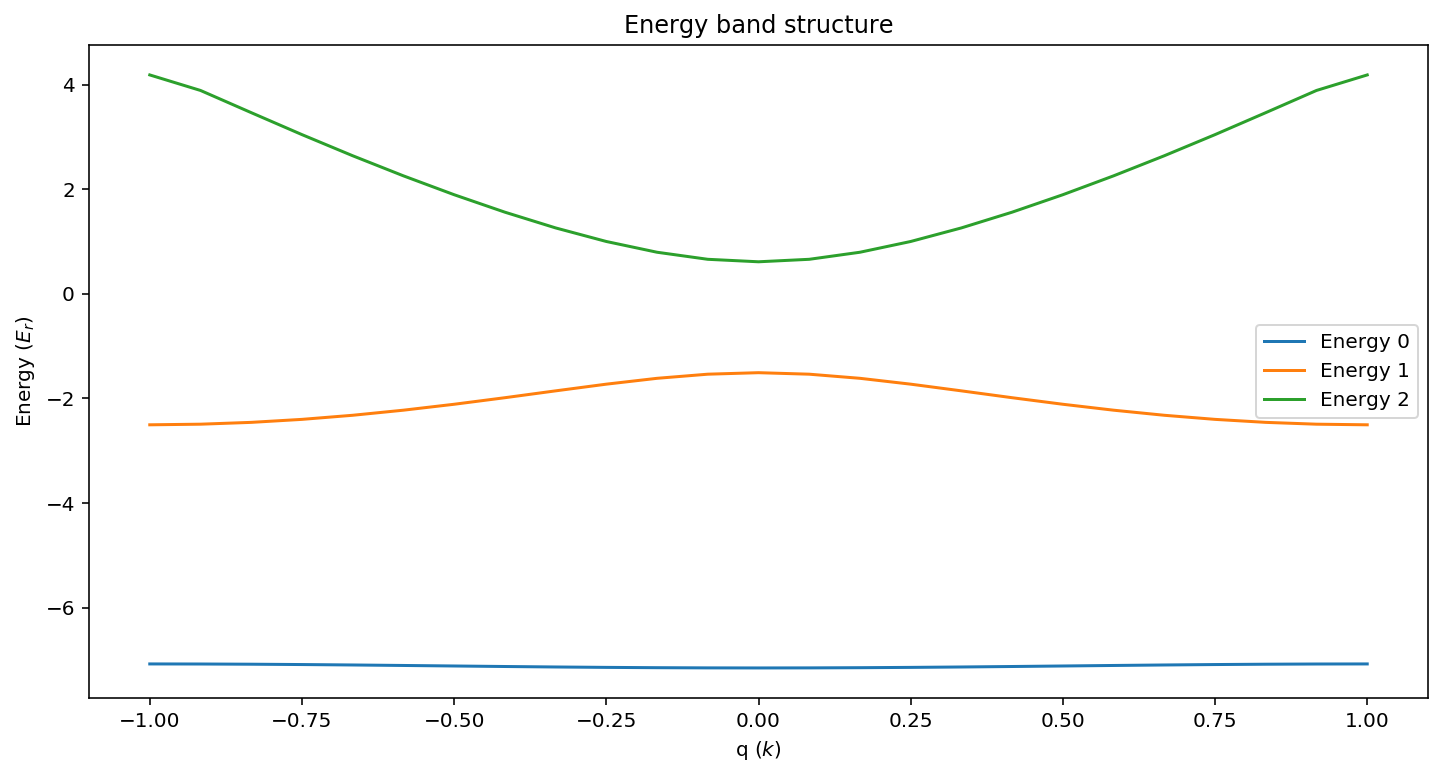

In [55]:
plt.figure(figsize=(12, 6))

for n in range(0, 3):
    plt.plot(qk, E[n], label=f'Energy {n}')
    
plt.title('Energy band structure')
plt.xlabel('q $(k)$')
plt.ylabel('Energy $(E_r)$')
plt.legend()
plt.savefig(os.path.join(figdir, 'band-structure.pdf'))
plt.show()

In [61]:
J_tb = (E[:, -1] - E[:, (E.shape[-1] // 2 - 1)]) / 4
J_tb[:5]

array([ 0.01887452, -0.24194235,  0.88130094, -1.48726915,  2.06364698])

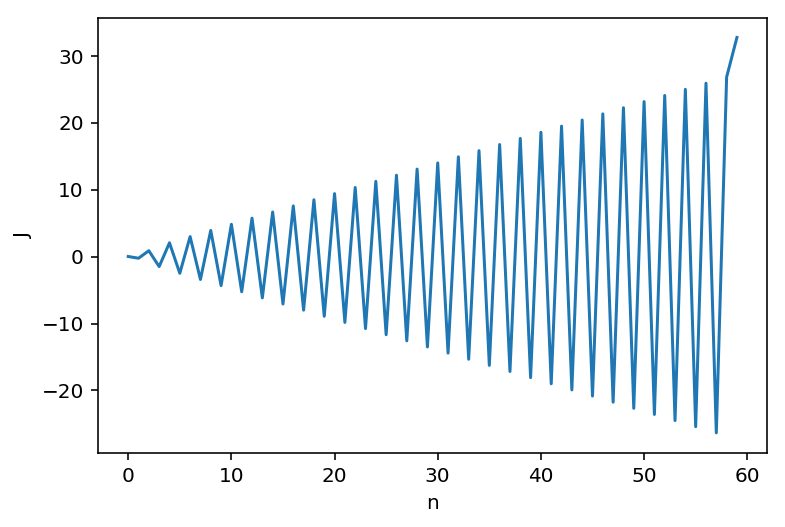

In [87]:
plt.plot(J_tb)
plt.xlabel('n')
plt.ylabel('J')
plt.show()

In [86]:
np.inner(E[0], np.ones_like(qk)) / N, E[0].mean(), np.sum(E[0]) / N, np.inner(E[0], np.exp(-1j*np.pi*qk*0)) / N

(-3.4870619940050727,
 -7.1136064677703486,
 -3.4870619940050727,
 (-3.4870619940050727+0j))

In [88]:
J_ex = np.zeros(N // 2).astype(np.complex128)

for n in range(N // 2):
#    for l in range(- N // 2, + N // 2 + 1):
    for l in [-1, 0, +1]:
        J_ex[n] += np.inner(E[n], np.exp(-1j*np.pi*qk*l)) / N

J_ex /= N        
J_ex

array([-6.32865269e-02+0.j, -1.35609521e-02+0.j,  2.85630130e-03+0.j,
        9.40805027e-02+0.j,  1.01754858e-01+0.j,  2.68242321e-01+0.j,
        2.79453184e-01+0.j,  5.13615840e-01+0.j,  5.28583118e-01+0.j,
        8.29922142e-01+0.j,  8.48638888e-01+0.j,  1.21704451e+00+0.j,
        1.23950803e+00+0.j,  1.67494351e+00+0.j,  1.70115269e+00+0.j,
        2.20360287e+00+0.j,  2.23355720e+00+0.j,  2.80301486e+00+0.j,
        2.83671407e+00+0.j,  3.47317544e+00+0.j,  3.51061939e+00+0.j,
        4.21408233e+00+0.j,  4.25527092e+00+0.j,  5.02573414e+00+0.j,
        5.07066733e+00+0.j])

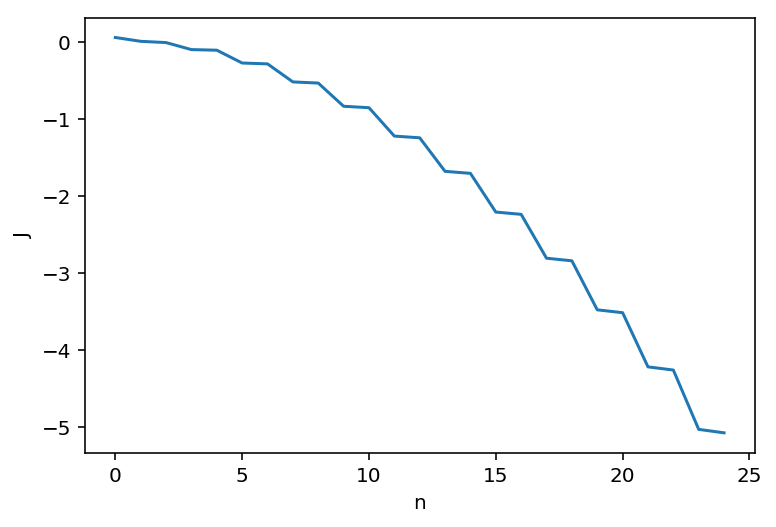

In [90]:
plt.plot(-J_ex.real)
plt.xlabel('n')
plt.ylabel('J')
plt.show()

In [28]:
J0 = np.sum([np.dot(E[0], np.exp(-1j*qk*a)) for l in range(-N // 2, N // 2 + 1)]) / N
J1 = np.sum([np.dot(E[1], np.exp(-1j*qk*a)) for l in range(-N // 2, N // 2 + 1)]) / N
J2 = np.sum([np.dot(E[2], np.exp(-1j*qk*a)) for l in range(-N // 2, N // 2 + 1)]) / N

J0, J1, J2

((-181.32722368825452+1.6409187291906837e-20j),
 (-52.988683337710576+1.1227338673409941e-20j),
 (54.98097314983752+4.793209972109629e-20j))

In [227]:
J = np.zeros((N+1, N+1, M+1))

for n in range(M+1):
    for i in range(-N//2, +N//2+1):
        for j in range(-N//2, +N//2+1):
            J[i,j,n] += np.dot(E[n], np.exp(1j*np.pi*qk*(i-j)))

J /= (N+1)

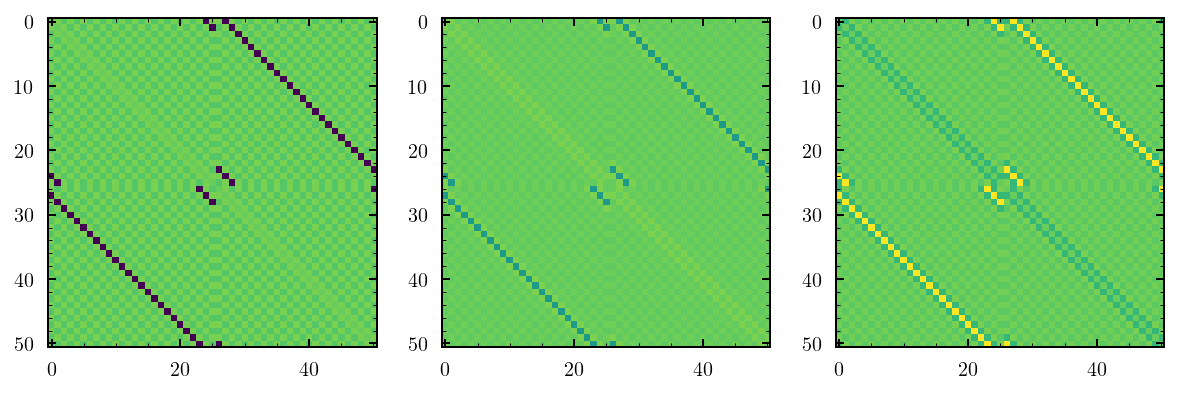

In [239]:
np.fill_diagonal(J[:,:,0], 0)
np.fill_diagonal(J[:,:,1], 0)
np.fill_diagonal(J[:,:,2], 0)


vmin = J[:,:,:3].min()
vmax = J[:,:,:3].max()

plt.figure(figsize=(10, 10))

plt.subplot(131)
plt.imshow(J[:,:,0], vmin=vmin, vmax=vmax)

plt.subplot(132)
plt.imshow(J[:,:,1], vmin=vmin, vmax=vmax)

plt.subplot(133)
im = plt.imshow(J[:,:,2], vmin=vmin, vmax=vmax)

#plt.colorbar(im)
plt.show()

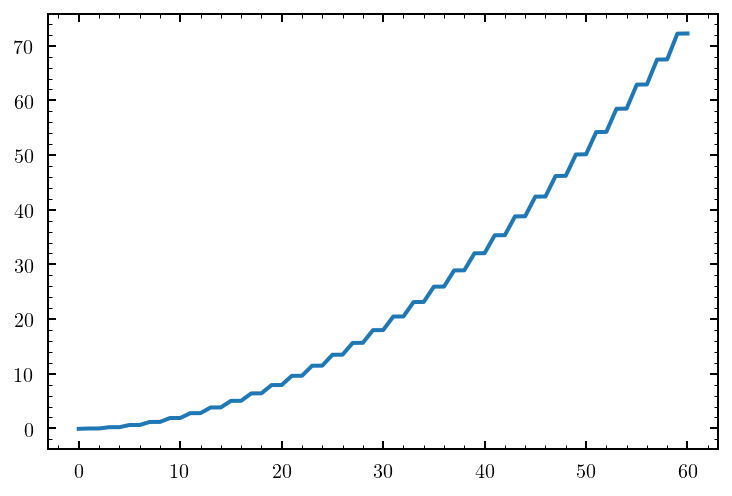

In [240]:
plt.plot(J.mean(axis=(0,1)))

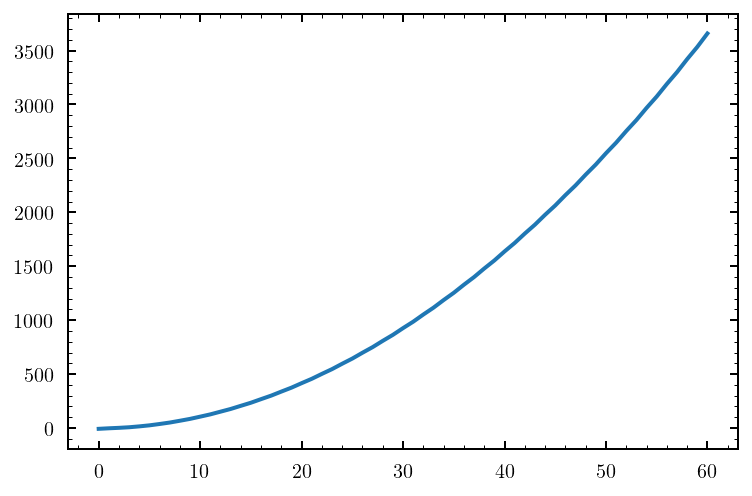

In [218]:
plt.plot(E.mean(axis=1))